___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
plt.rcParams["figure.figsize"] = (10, 6)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna
import pickle
from tensorflow.keras.models import load_model
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer


sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Uncomment the following lines if you want to suppress warnings:
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Set it to None to display all rows in the dataframe:
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe:
pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv("../data/Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum().any()

False

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [10]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

### Visualization

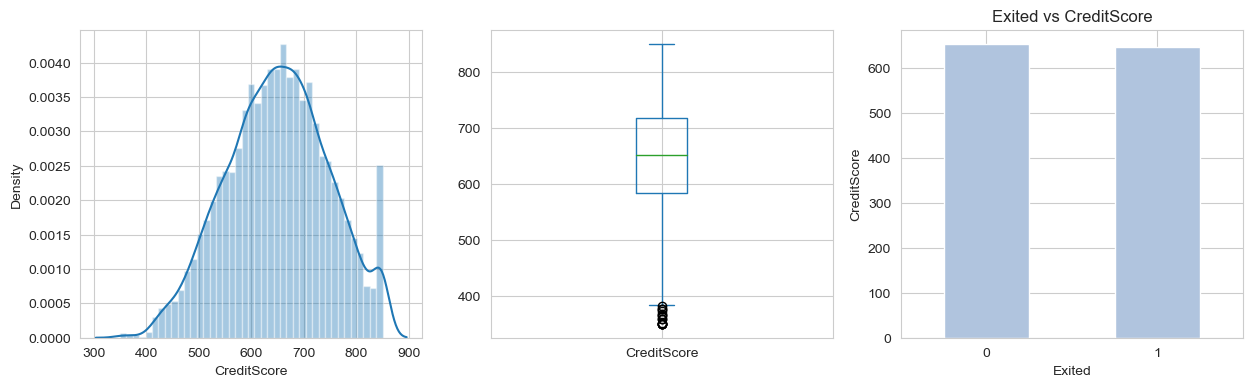

In [11]:

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.distplot(df['CreditScore'])
plt.subplot(1,3,2)
df['CreditScore'].plot.box()
plt.subplot(1,3,3)
OxG = df.groupby('Exited')['CreditScore'].mean()
OxG.plot(kind='bar', color ='lightsteelblue', title='Exited vs CreditScore', xlabel='Exited', ylabel='CreditScore')
plt.xticks(rotation=0);
plt.show();

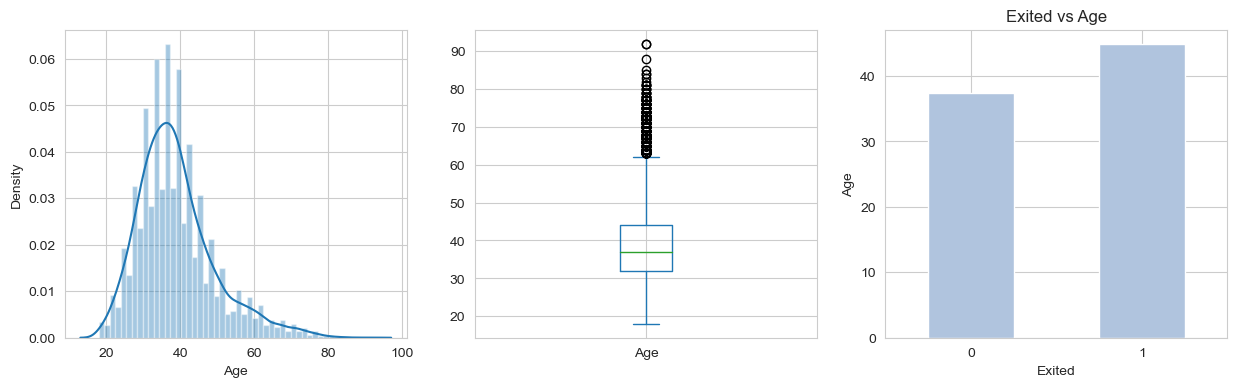

In [12]:


plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.distplot(df['Age'])
plt.subplot(1,3,2)
df['Age'].plot.box()
plt.subplot(1,3,3)
OxG = df.groupby('Exited')['Age'].mean()
OxG.plot(kind='bar', color ='lightsteelblue', title='Exited vs Age', xlabel='Exited', ylabel='Age')
plt.xticks(rotation=0);
plt.show();

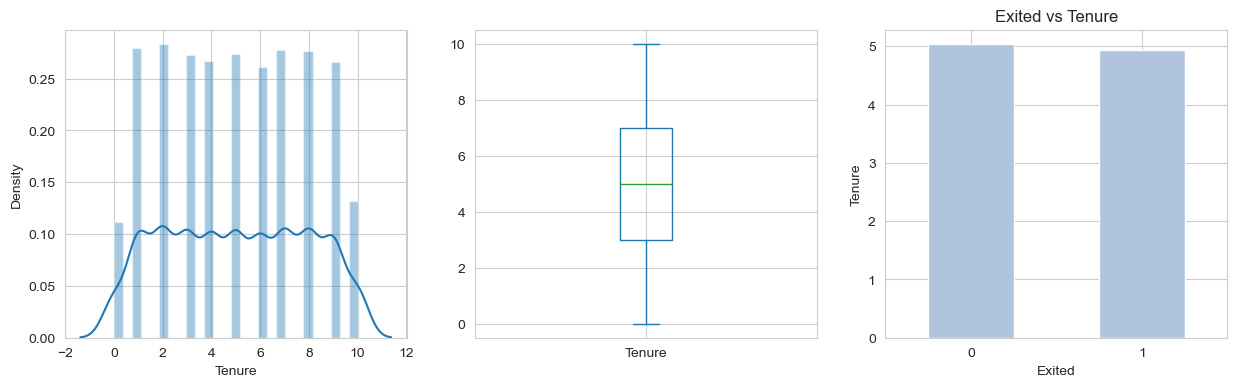

In [13]:
# Tenure The number of years for which the customer has been with the bank.

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.distplot(df['Tenure'])
plt.subplot(1,3,2)
df['Tenure'].plot.box()
plt.subplot(1,3,3)
OxG = df.groupby('Exited')['Tenure'].mean()
OxG.plot(kind='bar', color ='lightsteelblue', title='Exited vs Tenure', xlabel='Exited', ylabel='Tenure')
plt.xticks(rotation=0);
plt.show();

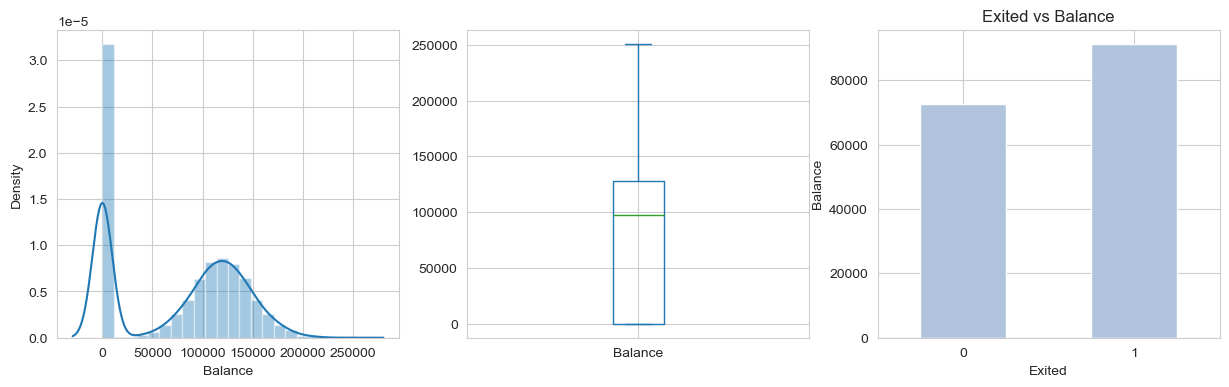

In [14]:


plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.distplot(df['Balance'])
plt.subplot(1,3,2)
df['Balance'].plot.box()
plt.subplot(1,3,3)
OxG = df.groupby('Exited')['Balance'].mean()
OxG.plot(kind='bar', color ='lightsteelblue', title='Exited vs Balance', xlabel='Exited', ylabel='Balance')
plt.xticks(rotation=0);
plt.show();

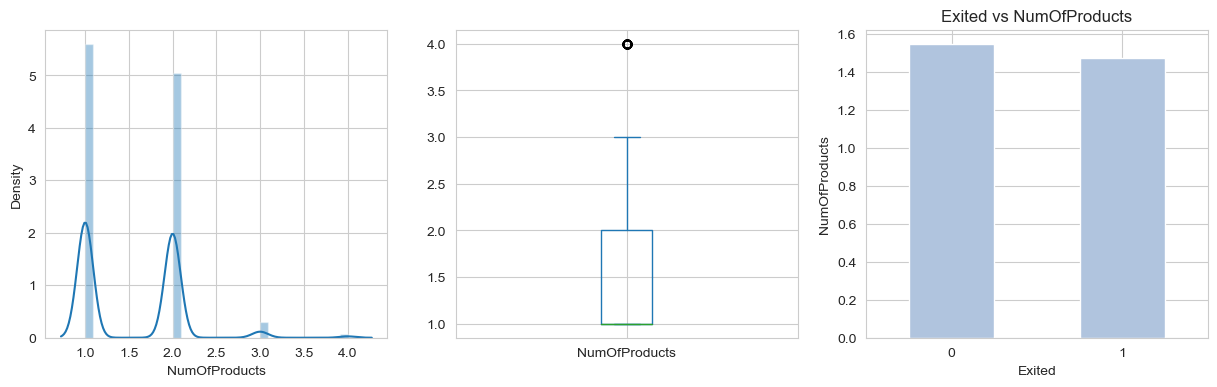

In [15]:


plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.distplot(df['NumOfProducts'])
plt.subplot(1,3,2)
df['NumOfProducts'].plot.box()
plt.subplot(1,3,3)
OxG = df.groupby('Exited')['NumOfProducts'].mean()
OxG.plot(kind='bar', color ='lightsteelblue', title='Exited vs NumOfProducts', xlabel='Exited', ylabel='NumOfProducts')
plt.xticks(rotation=0);
plt.show();

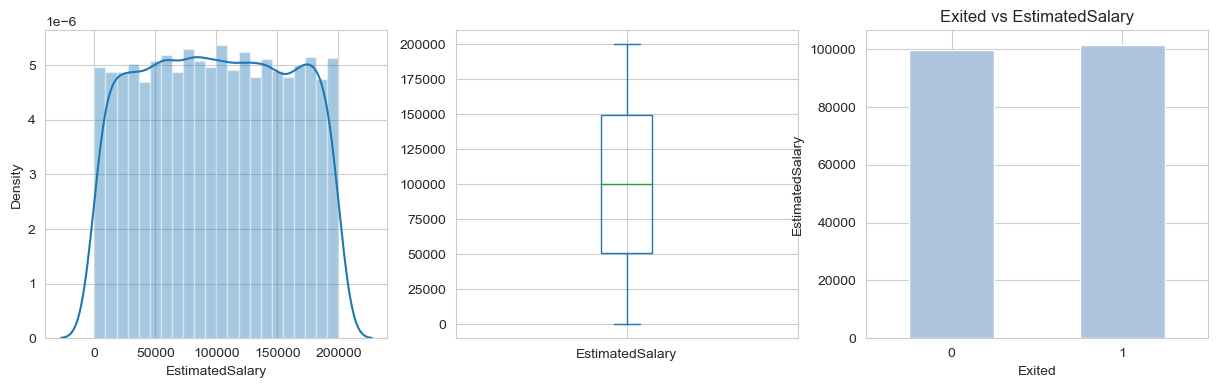

In [16]:


plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.distplot(df['EstimatedSalary'])
plt.subplot(1,3,2)
df['EstimatedSalary'].plot.box()
plt.subplot(1,3,3)
OxG = df.groupby('Exited')['EstimatedSalary'].mean()
OxG.plot(kind='bar', color ='lightsteelblue', title='Exited vs EstimatedSalary', xlabel='Exited', ylabel='EstimatedSalary')
plt.xticks(rotation=0);
plt.show();

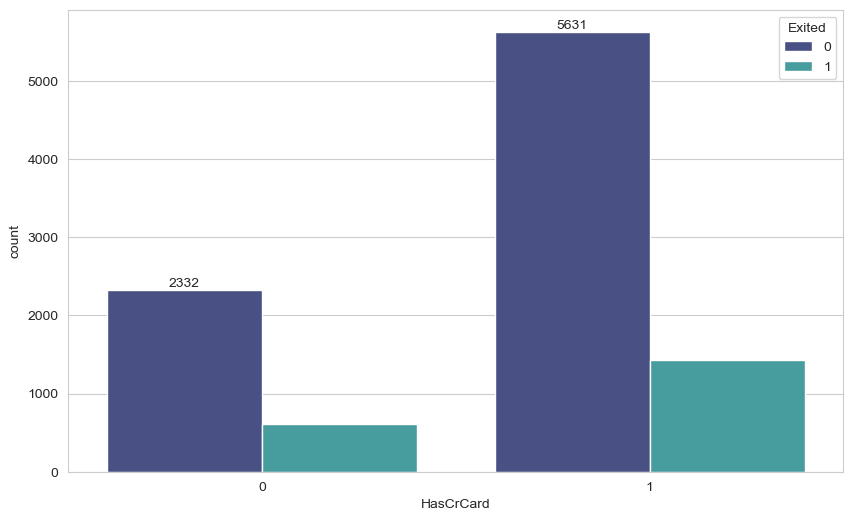

In [147]:

ax= sns.countplot(x='HasCrCard',hue='Exited', data=df, palette= 'mako')
ax.bar_label(ax.containers[0])
plt.show()

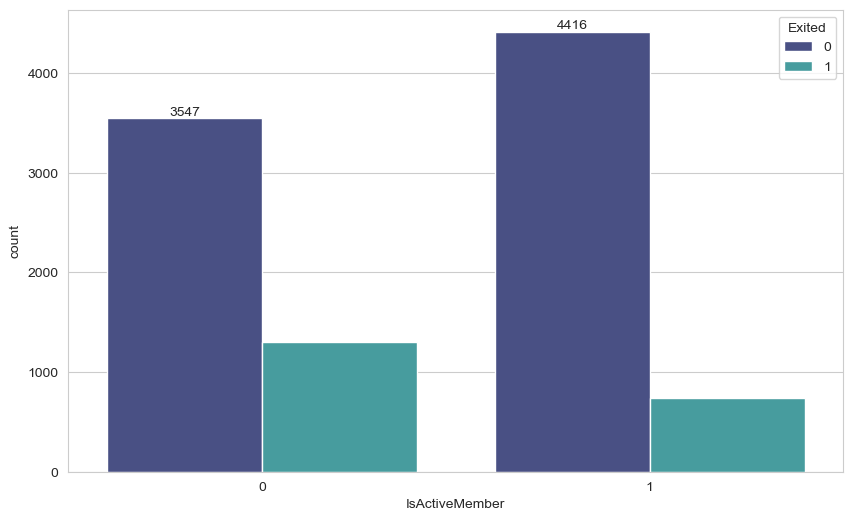

In [149]:
ax= sns.countplot(x='IsActiveMember',hue='Exited', data=df, palette= 'mako')
ax.bar_label(ax.containers[0])
plt.show()

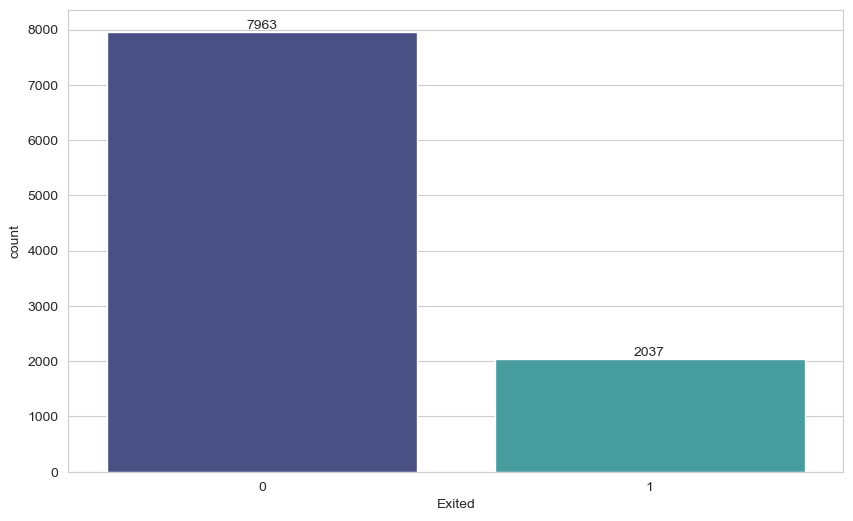

In [150]:
#imbalance classes
ax= sns.countplot(x=df["Exited"],palette ='mako')
ax.bar_label(ax.containers[0])
plt.show()


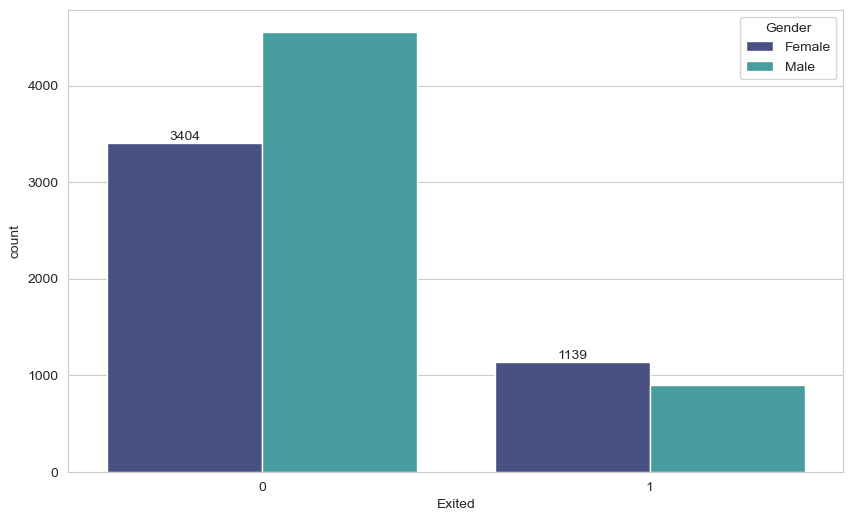

In [151]:
ax= sns.countplot(x='Exited', hue='Gender', data=df, palette= 'mako')
ax.bar_label(ax.containers[0])
plt.show()


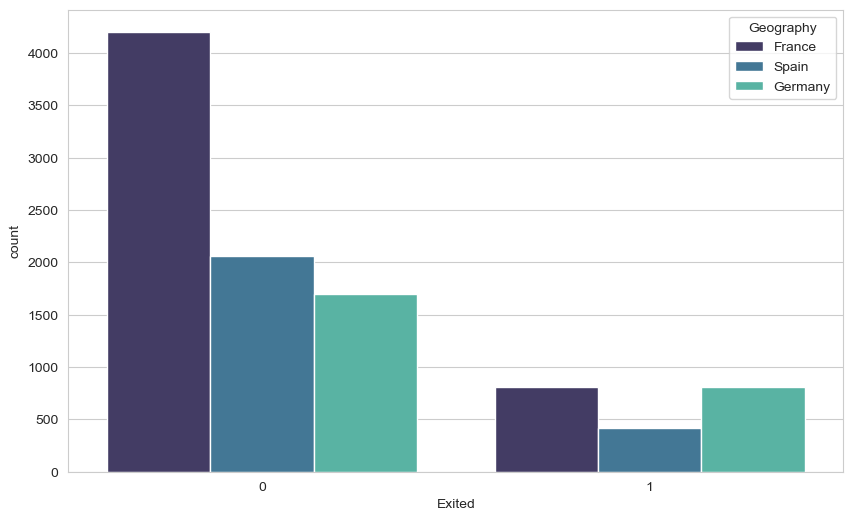

In [152]:
sns.countplot(x='Exited', hue='Geography', data=df, palette= 'mako')
ax.bar_label(ax.containers[0])
plt.show()


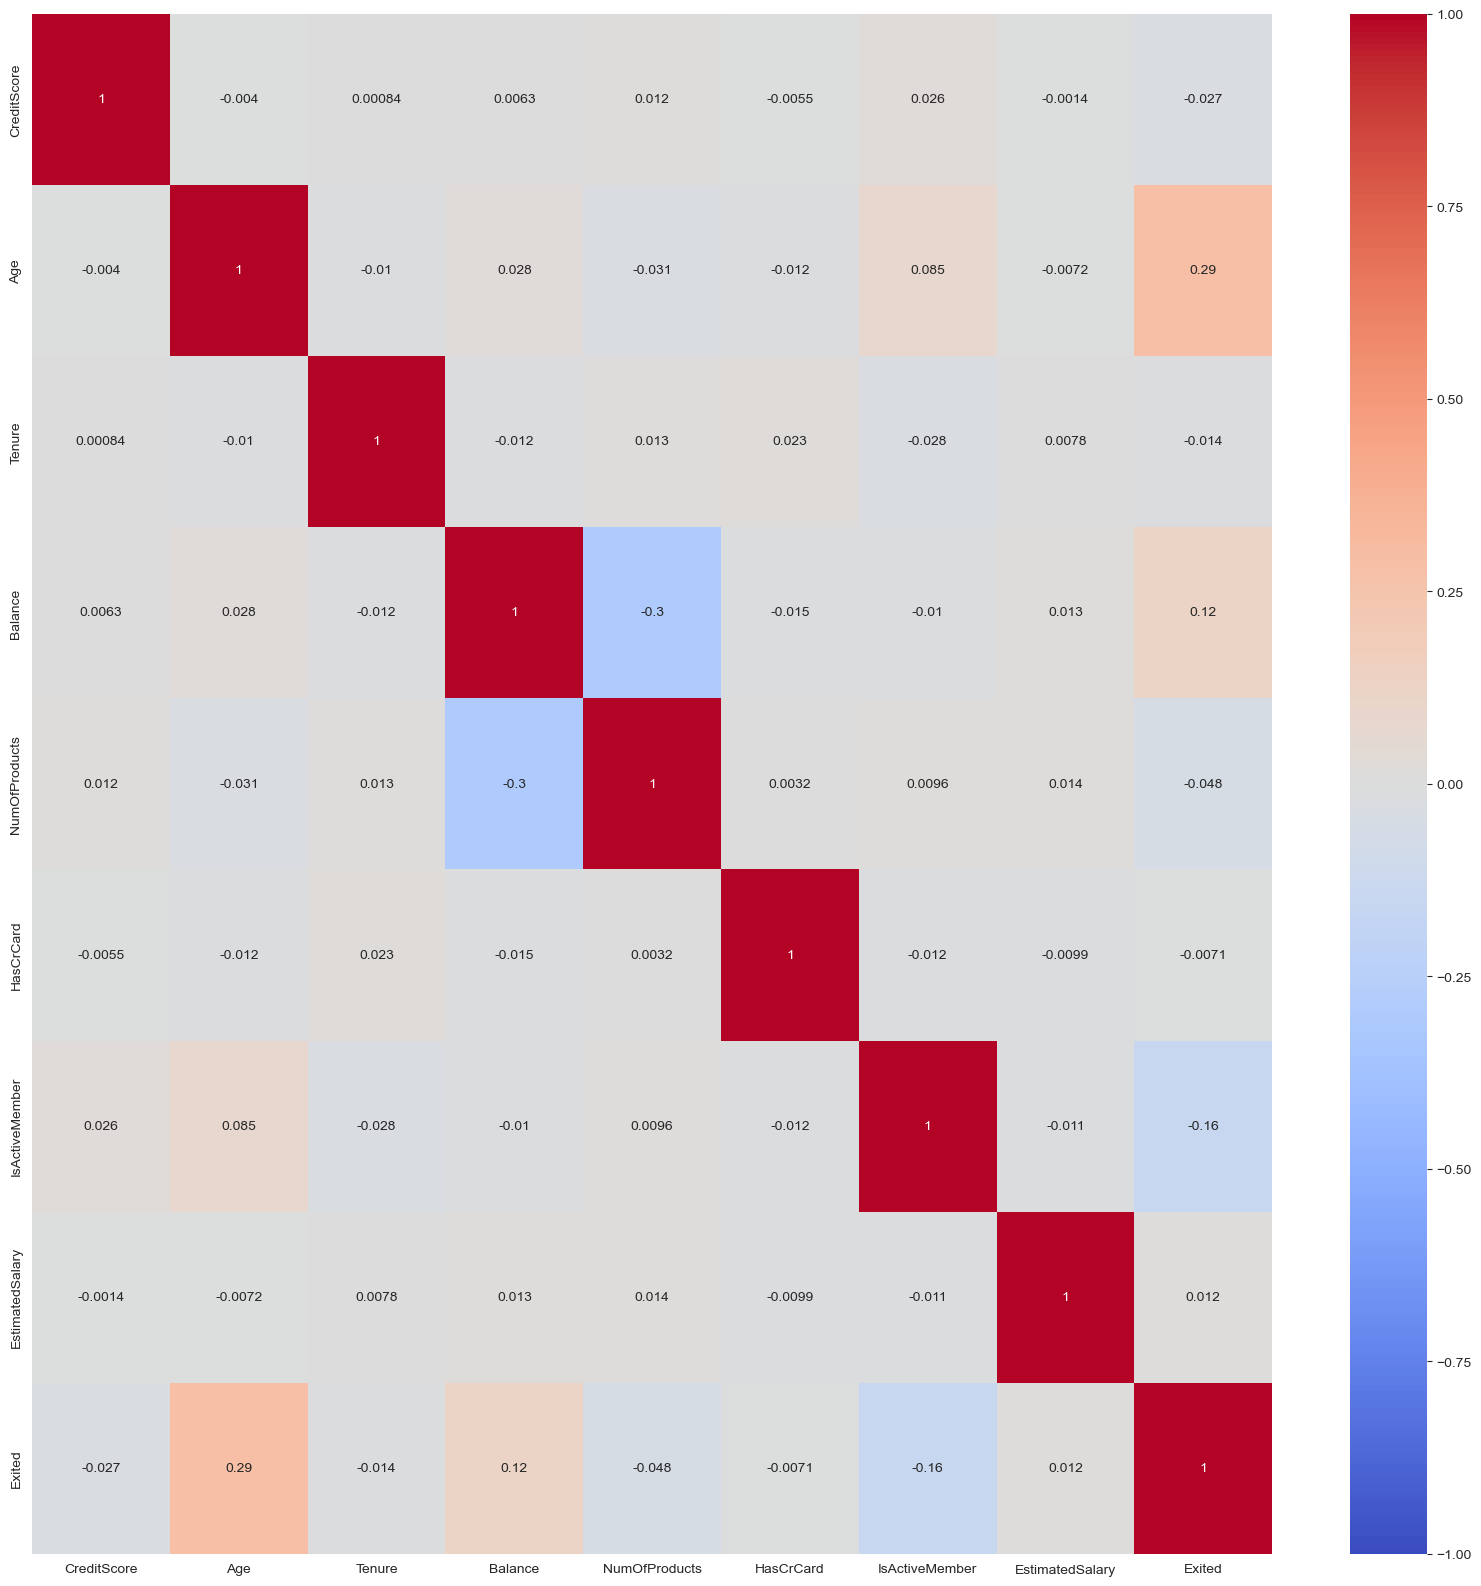

In [128]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1,cmap="coolwarm")
plt.show()

In [20]:
drop_list = [
    'RowNumber', 'CustomerId', 'Surname'
]

In [21]:
df = df.drop(drop_list, axis=1)

In [22]:
df.shape

(10000, 11)

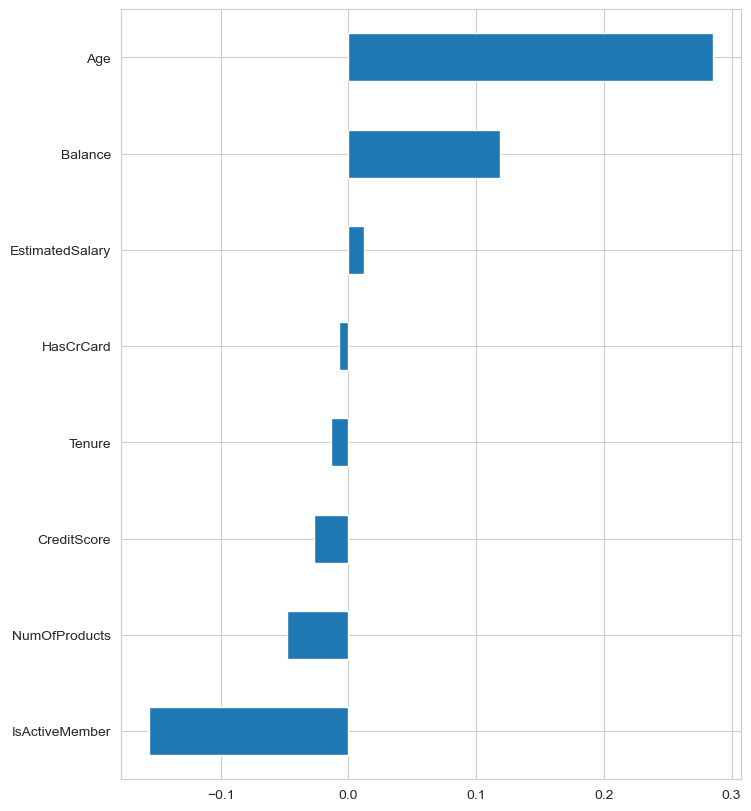

In [23]:
plt.figure(figsize=(8, 10))
(df.corr(numeric_only=True)["Exited"].sort_values().drop("Exited").plot(kind="barh"))
plt.show()

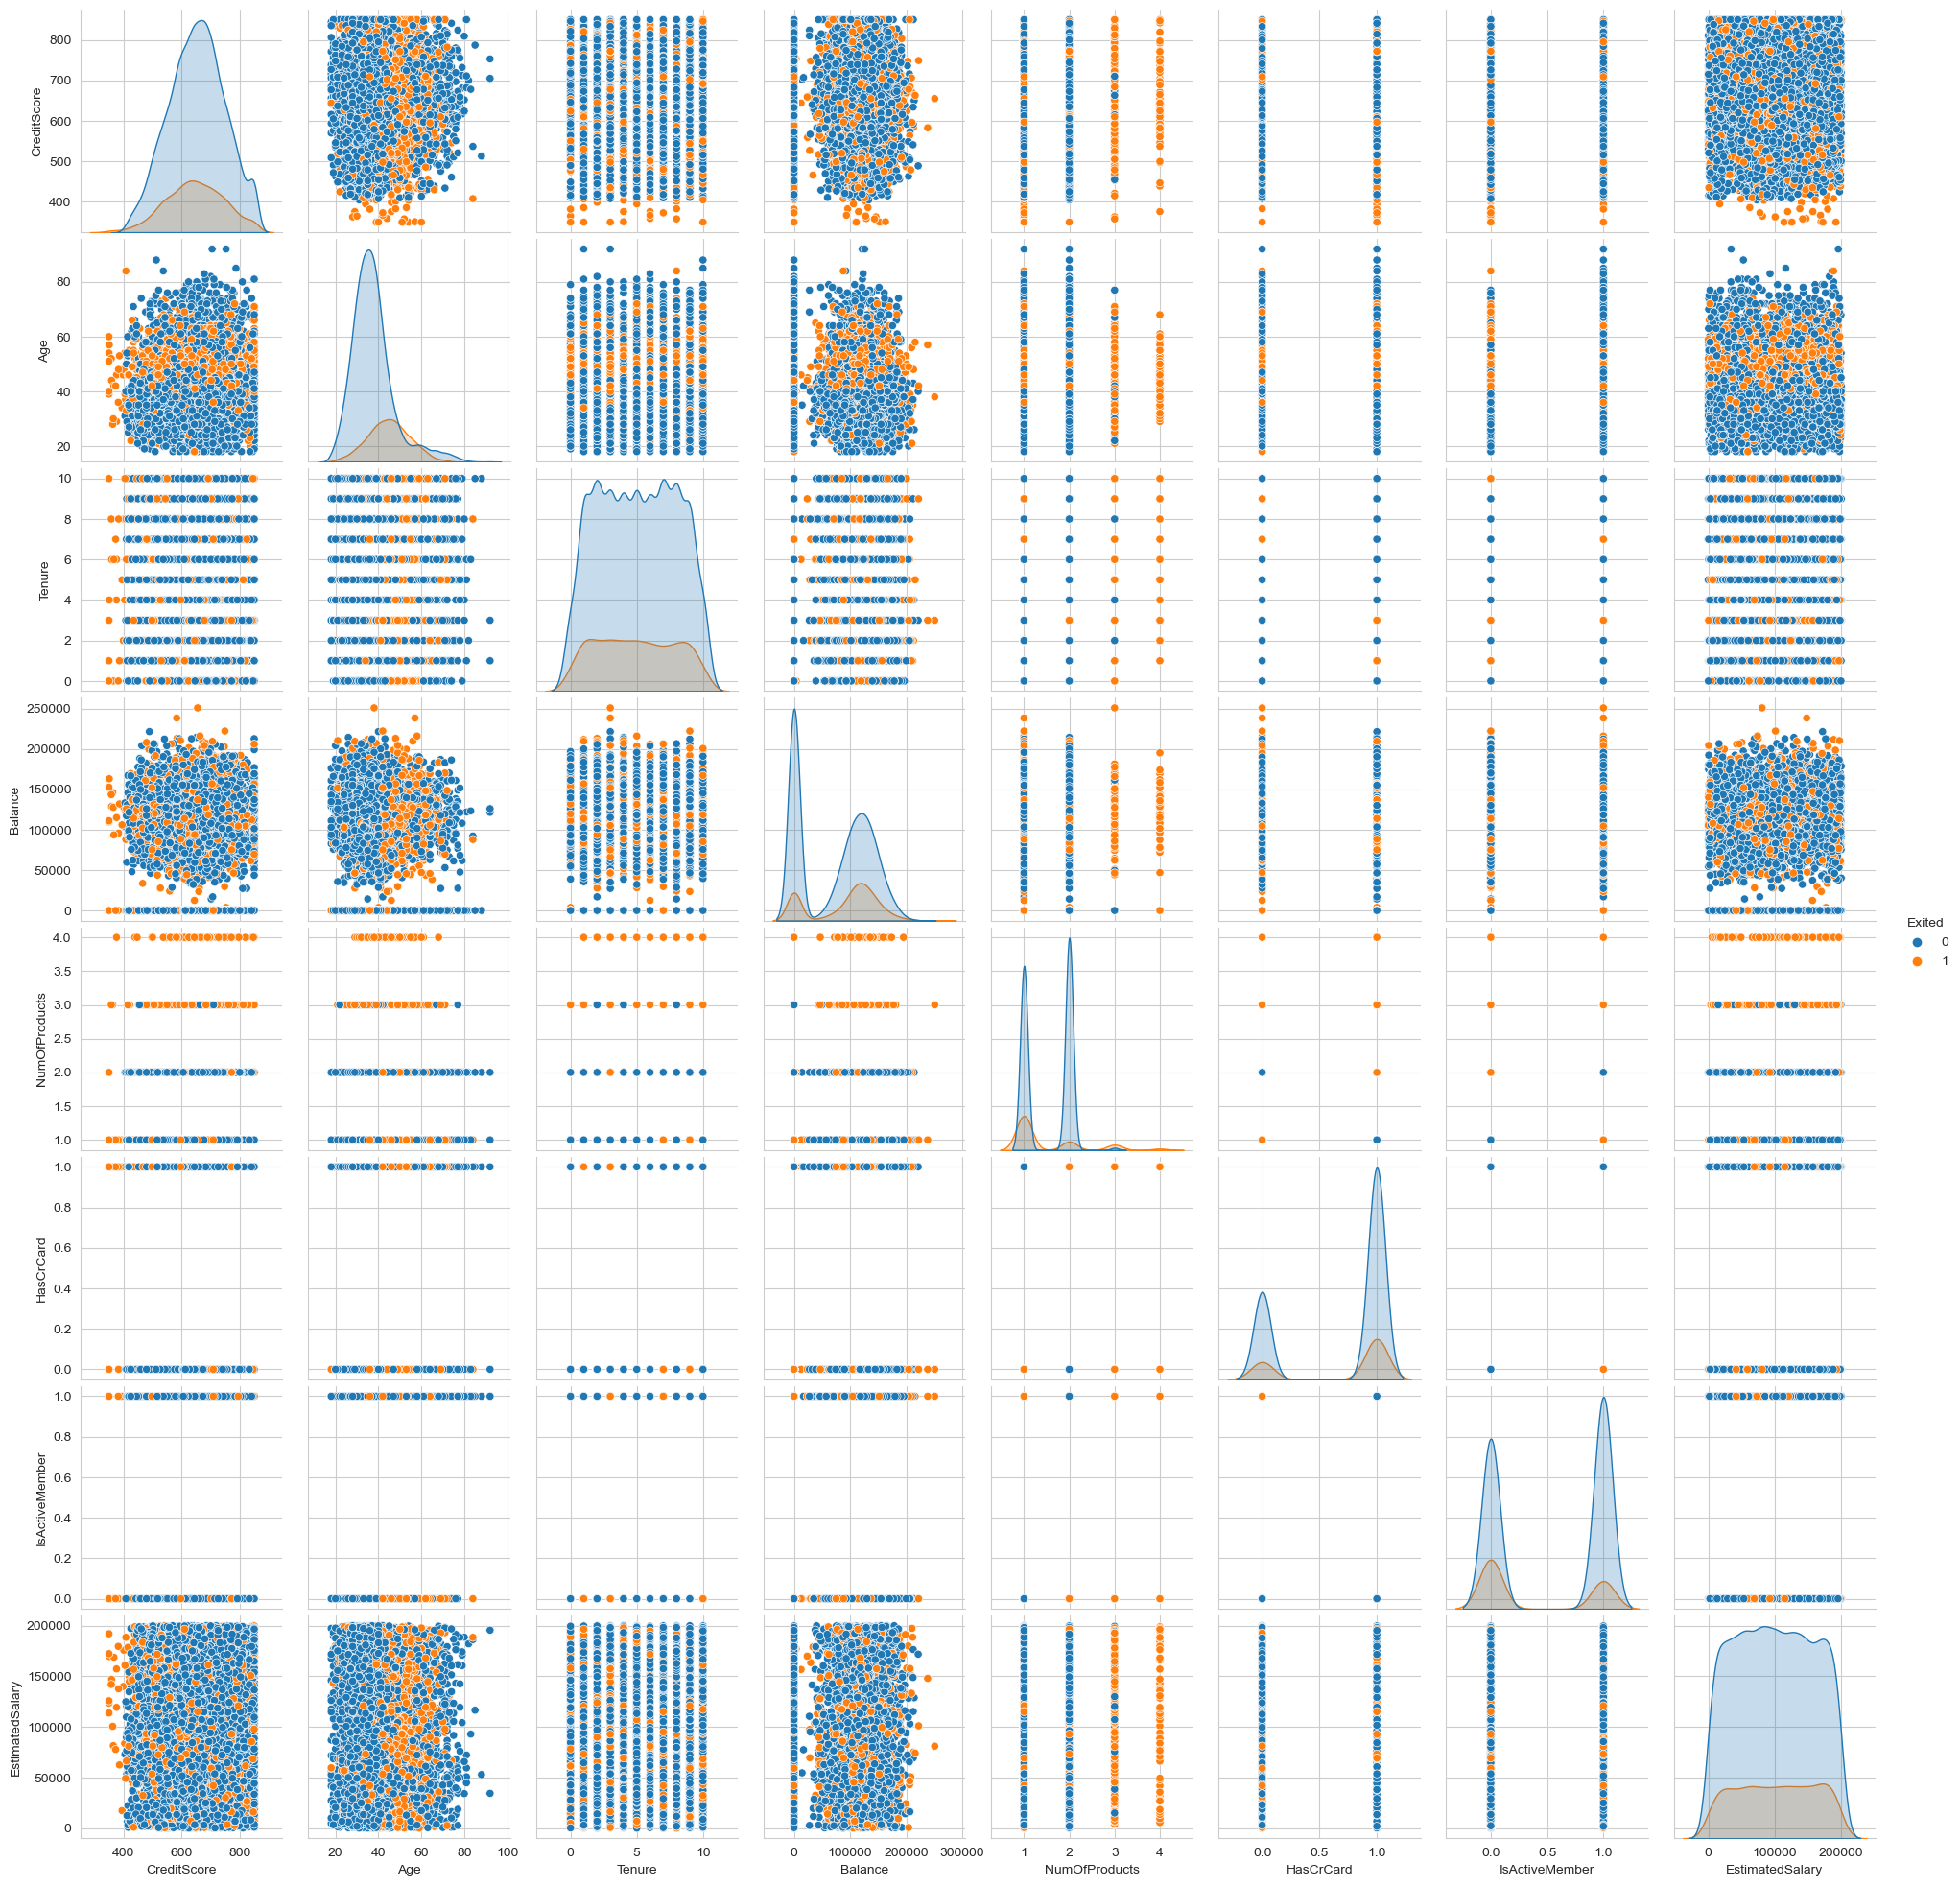

In [24]:
sns.pairplot(df, hue = 'Exited')

In [27]:
# features to be one-hot encoded
categorical_features = ['Gender' ,'Geography']

In [28]:
# transform categorical features using one-hot encoder
column_transformer = make_column_transformer((
               OneHotEncoder( handle_unknown='ignore',
                              sparse_output=False), 
                              categorical_features),
                              remainder = 'passthrough', 
                              verbose_feature_names_out=False)

In [29]:
df.head(1)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1


In [30]:
scaler = MinMaxScaler()

# Preprocessing of Data
- Train | Test Split, Scalling

In [31]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [32]:
seed = 42

In [33]:
# make validation  split to make sure that there is 2 classes in the val set 
X_train, X_test, y_train, y_test = train_test_split(X,y , stratify=y, test_size=0.1, random_state=seed)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.1, random_state=seed)

In [34]:
# transforming X
X_train = column_transformer.fit_transform(X_train)
X_test = column_transformer.transform(X_test)
X_val = column_transformer.transform(X_val)

In [35]:
#scale data 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val= scaler.transform(X_val)

In [36]:
X_train.shape

(8100, 13)

In [37]:
X_test.shape

(1000, 13)

In [38]:
X_val.shape

(900, 13)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [39]:
tf.random.set_seed(seed)

vanilla_model = Sequential()

vanilla_model.add(Dense(36, activation="relu"))
vanilla_model.add(Dense(18, activation="relu"))
vanilla_model.add(Dense(9, activation="relu"))
vanilla_model.add(Dense(1, activation="sigmoid"))

vanilla_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['Recall'])

In [40]:
vanilla_model.fit(
    x=X_train, y=y_train, batch_size=32, epochs=1000, verbose=1
)

Epoch 1/1000


2023-10-30 22:58:40.323919: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


254/254 [==============================] - 1s 579us/step - loss: 0.5073 - recall: 0.0067
Epoch 2/1000
254/254 [==============================] - 0s 440us/step - loss: 0.4524 - recall: 0.0000e+00
Epoch 3/1000
254/254 [==============================] - 0s 436us/step - loss: 0.4359 - recall: 0.0000e+00
Epoch 4/1000
254/254 [==============================] - 0s 442us/step - loss: 0.4298 - recall: 0.0018
Epoch 5/1000
254/254 [==============================] - 0s 470us/step - loss: 0.4244 - recall: 0.1782
Epoch 6/1000
254/254 [==============================] - 0s 503us/step - loss: 0.4175 - recall: 0.2515
Epoch 7/1000
254/254 [==============================] - 0s 458us/step - loss: 0.4077 - recall: 0.2976
Epoch 8/1000
254/254 [==============================] - 0s 493us/step - loss: 0.3946 - recall: 0.3297
Epoch 9/1000
254/254 [==============================] - 0s 473us/step - loss: 0.3790 - recall: 0.3745
Epoch 10/1000
254/254 [==============================] - 0s 465us/step - loss: 0.3650 -

In [41]:
vanilla_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                504       
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,351
Trainable params: 1,351
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [42]:
loss_df = pd.DataFrame(vanilla_model.history.history)
loss_df.head()

,loss,recall
0,0.507,0.007
1,0.452,0.000
2,0.436,0.000
3,0.430,0.002
4,0.424,0.178


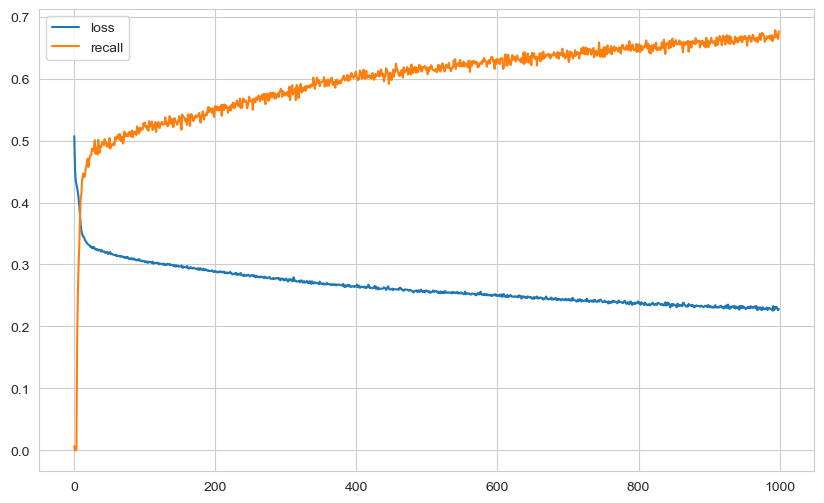

In [43]:
loss_df.plot()
plt.show()

In [44]:
loss, Recall   = vanilla_model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
vanilla_Recall=Recall
print('vanilla_Recall',Recall) 



loss:  0.5427901148796082
vanilla_Recall 0.529411792755127


In [45]:
y_pred = vanilla_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 350us/step
[[720  76]
 [ 96 108]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       796
           1       0.59      0.53      0.56       204

    accuracy                           0.83      1000
   macro avg       0.73      0.72      0.73      1000
weighted avg       0.82      0.83      0.82      1000



 1/32 [..............................] - ETA: 0s

32/32 [==============================] - 0s 406us/step


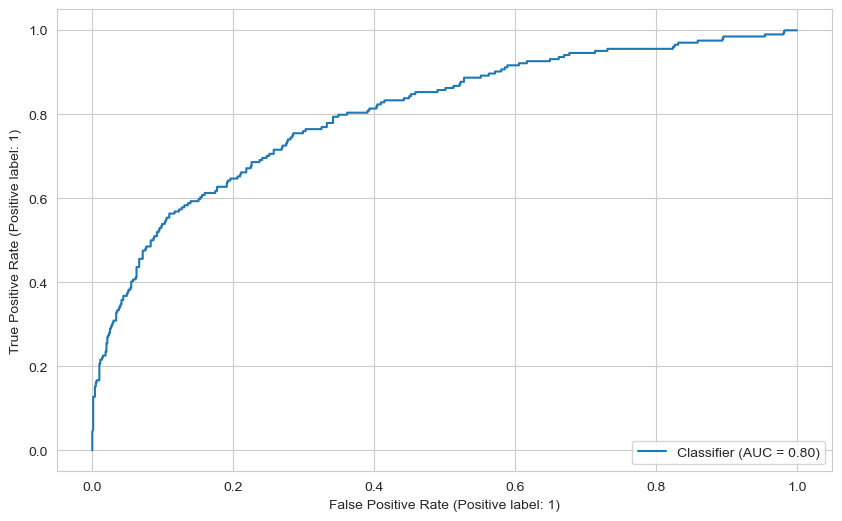

In [46]:
y_pred_proba = vanilla_model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [47]:
roc_auc_score(y_test, y_pred_proba)

0.8030255443886098

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [48]:
from sklearn.utils import class_weight
sklearn_weights = class_weight.compute_class_weight('balanced', y=df['Exited'],classes=np.unique(y))
sklearn_weights

array([0.62790406, 2.45459008])

In [49]:
print(f'The weights for the majority class is {sklearn_weights[0]:.3f}')
print(f'The weights for the minority class is {sklearn_weights[1]:.3f}')

The weights for the majority class is 0.628
The weights for the minority class is 2.455


### Create The Model

In [50]:
tf.random.set_seed(seed)
weights_model = Sequential()

weights_model.add(Dense(36, activation="relu"))
weights_model.add(Dense(18, activation="relu"))
weights_model.add(Dense(9, activation="relu"))
weights_model.add(Dense(1, activation="sigmoid"))

weights_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [51]:
weights_model.fit(
    x=X_train, y=y_train, batch_size=32, epochs=1000, verbose=1, class_weight= {0: 0.628 , 1: 2.455}
)

Epoch 1/1000


254/254 [==============================] - 0s 522us/step - loss: 0.6397 - recall: 0.6212
Epoch 2/1000
254/254 [==============================] - 0s 480us/step - loss: 0.5934 - recall: 0.7006
Epoch 3/1000
254/254 [==============================] - 0s 673us/step - loss: 0.5673 - recall: 0.6891
Epoch 4/1000
254/254 [==============================] - 0s 476us/step - loss: 0.5462 - recall: 0.7145
Epoch 5/1000
254/254 [==============================] - 0s 477us/step - loss: 0.5122 - recall: 0.7388
Epoch 6/1000
254/254 [==============================] - 0s 488us/step - loss: 0.4926 - recall: 0.7461
Epoch 7/1000
254/254 [==============================] - 0s 479us/step - loss: 0.4809 - recall: 0.7588
Epoch 8/1000
254/254 [==============================] - 0s 476us/step - loss: 0.4743 - recall: 0.7552
Epoch 9/1000
254/254 [==============================] - 0s 477us/step - loss: 0.4716 - recall: 0.7473
Epoch 10/1000
254/254 [==============================] - 0s 475us/step - loss: 0.4700 - recall:

In [52]:
weights_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 36)                504       
                                                                 
 dense_5 (Dense)             (None, 18)                666       
                                                                 
 dense_6 (Dense)             (None, 9)                 171       
                                                                 
 dense_7 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,351
Trainable params: 1,351
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [53]:
loss_df = pd.DataFrame(weights_model.history.history)
loss_df.head()

,loss,recall
0,0.640,0.621
1,0.593,0.701
2,0.567,0.689
3,0.546,0.715
4,0.512,0.739


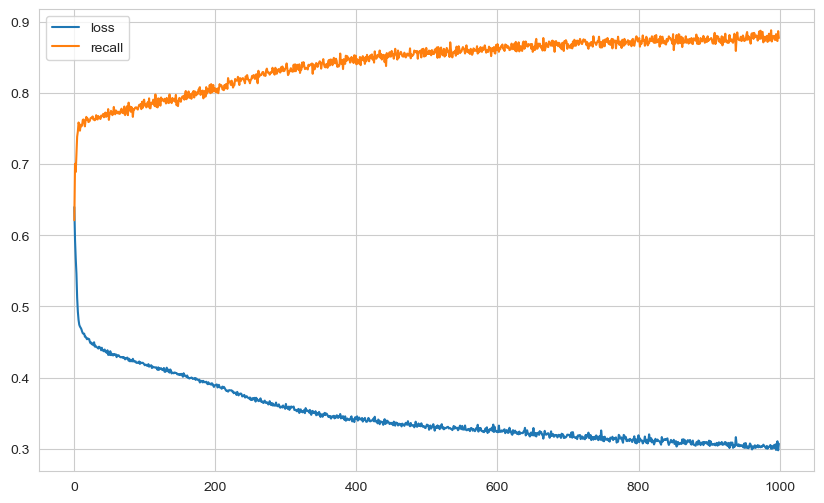

In [54]:
loss_df.plot()
plt.show()

In [55]:
loss, Recall = weights_model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
weights_Recall= print("weights_Recall: ", Recall)
weights_Recall= Recall

loss:  0.6385585069656372
weights_Recall:  0.6813725233078003


In [56]:
y_pred = weights_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 361us/step
[[624 172]
 [ 65 139]]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       796
           1       0.45      0.68      0.54       204

    accuracy                           0.76      1000
   macro avg       0.68      0.73      0.69      1000
weighted avg       0.81      0.76      0.78      1000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [57]:
tf.random.set_seed(seed)

lr_model = Sequential()

lr_model.add(Dense(36, activation="relu"))
lr_model.add(Dense(18, activation="relu"))
lr_model.add(Dense(9, activation="relu"))
lr_model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
lr_model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [58]:
lr_model.fit(
    x=X_train, y=y_train, batch_size=32, epochs=1000, verbose=1, class_weight= {0: 0.628 , 1: 2.455}
)

Epoch 1/1000
254/254 [==============================] - 0s 519us/step - loss: 0.6308 - recall: 0.6552
Epoch 2/1000
254/254 [==============================] - 0s 482us/step - loss: 0.5684 - recall: 0.7109
Epoch 3/1000
254/254 [==============================] - 0s 477us/step - loss: 0.5097 - recall: 0.7327
Epoch 4/1000
254/254 [==============================] - 0s 484us/step - loss: 0.4748 - recall: 0.7473
Epoch 5/1000
254/254 [==============================] - 0s 471us/step - loss: 0.4704 - recall: 0.7479
Epoch 6/1000
254/254 [==============================] - 0s 470us/step - loss: 0.4700 - recall: 0.7497
Epoch 7/1000
254/254 [==============================] - 0s 474us/step - loss: 0.4633 - recall: 0.7630
Epoch 8/1000
254/254 [==============================] - 0s 474us/step - loss: 0.4581 - recall: 0.7455
Epoch 9/1000
254/254 [==============================] - 0s 470us/step - loss: 0.4563 - recall: 0.7588
Epoch 10/1000
254/254 [==============================] - 0s 470us/step - loss: 0.4

<Axes: >

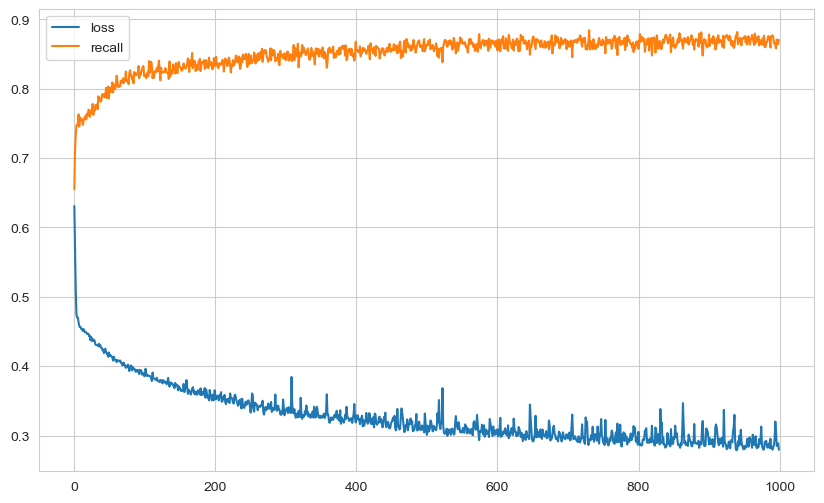

In [59]:
loss_df = pd.DataFrame(lr_model.history.history)
loss_df.plot()

In [60]:
loss, Recall = lr_model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
lr_Recall= print("lr_Recall: ", Recall)
lr_Recall= Recall

loss:  1.1666001081466675
lr_Recall:  0.7107843160629272


In [61]:
y_pred = lr_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[632 164]
 [ 59 145]]
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       796
           1       0.47      0.71      0.57       204

    accuracy                           0.78      1000
   macro avg       0.69      0.75      0.71      1000
weighted avg       0.82      0.78      0.79      1000



### Add Dropout Layer

In [62]:
tf.random.set_seed(seed)

dropout_model = Sequential()

dropout_model.add(Dense(36, activation="relu"))
dropout_model.add(Dropout(0.5))

dropout_model.add(Dense(18, activation="relu"))
dropout_model.add(Dropout(0.5))

dropout_model.add(Dense(9, activation="relu"))
dropout_model.add(Dropout(0.5))

dropout_model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
dropout_model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [63]:
dropout_model.fit(
    x=X_train, y=y_train, batch_size=32, epochs=1000, verbose=1, class_weight= {0: 0.628 , 1: 2.455}
)

Epoch 1/1000


254/254 [==============================] - 1s 593us/step - loss: 0.6938 - recall: 0.4703
Epoch 2/1000
254/254 [==============================] - 0s 608us/step - loss: 0.6681 - recall: 0.6994
Epoch 3/1000
254/254 [==============================] - 0s 567us/step - loss: 0.6459 - recall: 0.6000
Epoch 4/1000
254/254 [==============================] - 0s 528us/step - loss: 0.6229 - recall: 0.6315
Epoch 5/1000
254/254 [==============================] - 0s 518us/step - loss: 0.6137 - recall: 0.6582
Epoch 6/1000
254/254 [==============================] - 0s 523us/step - loss: 0.5985 - recall: 0.6648
Epoch 7/1000
254/254 [==============================] - 0s 560us/step - loss: 0.5917 - recall: 0.6715
Epoch 8/1000
254/254 [==============================] - 0s 574us/step - loss: 0.5759 - recall: 0.6867
Epoch 9/1000
254/254 [==============================] - 0s 589us/step - loss: 0.5659 - recall: 0.6952
Epoch 10/1000
254/254 [==============================] - 0s 574us/step - loss: 0.5748 - recall:

<Axes: >

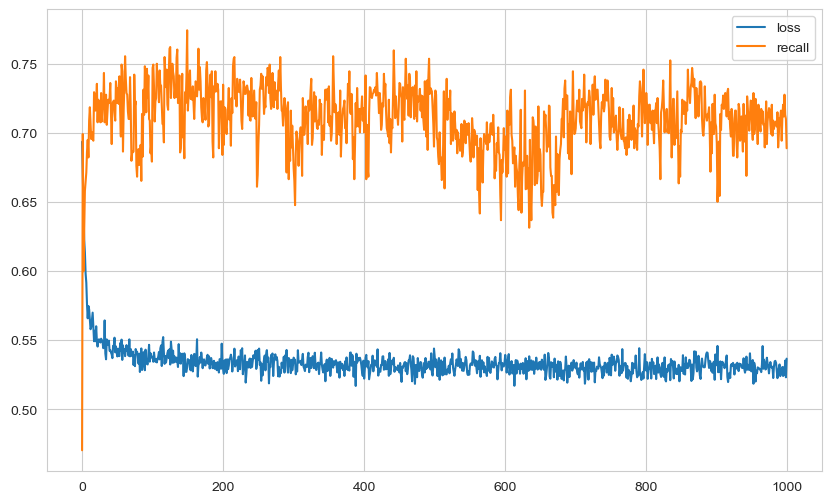

In [64]:
loss_df = pd.DataFrame(dropout_model.history.history)
loss_df.plot()

In [65]:
loss, Recall = dropout_model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
dropout_Recall= print("dropout_Recall: ", Recall)
dropout_Recall= Recall

loss:  0.5015386939048767
dropout_Recall:  0.7058823704719543


In [66]:
y_pred = dropout_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

 1/32 [..............................] - ETA: 1s

32/32 [==============================] - 0s 957us/step
[[658 138]
 [ 60 144]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       796
           1       0.51      0.71      0.59       204

    accuracy                           0.80      1000
   macro avg       0.71      0.77      0.73      1000
weighted avg       0.83      0.80      0.81      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [67]:
tf.random.set_seed(seed)

early_stop_model = Sequential()

early_stop_model.add(Dense(36, activation="relu"))
early_stop_model.add(Dropout(0.5))

early_stop_model.add(Dense(18, activation="relu"))
early_stop_model.add(Dropout(0.5))

early_stop_model.add(Dense(9, activation="relu"))
early_stop_model.add(Dropout(0.5))

early_stop_model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
early_stop_model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [68]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15
)

#### Monitor the "val_recall" as metric

In [69]:
X_val = np.asarray(X_val).astype(np.float32)
y_val = np.asarray(y_val).astype(np.float32)

In [70]:

early_stop_model.fit(
    x=X_train, y=y_train, validation_data= (X_val,y_val) ,batch_size=128, epochs=1000, verbose=1, class_weight= {0: 0.628 , 1: 2.455}, callbacks=[early_stop])
    

Epoch 1/1000


64/64 [==============================] - 1s 2ms/step - loss: 0.6942 - recall: 0.4764 - val_loss: 0.6831 - val_recall: 0.6557
Epoch 2/1000
64/64 [==============================] - 0s 903us/step - loss: 0.6775 - recall: 0.6497 - val_loss: 0.6297 - val_recall: 0.3661
Epoch 3/1000
64/64 [==============================] - 0s 835us/step - loss: 0.6593 - recall: 0.6006 - val_loss: 0.6309 - val_recall: 0.6230
Epoch 4/1000
64/64 [==============================] - 0s 849us/step - loss: 0.6387 - recall: 0.6255 - val_loss: 0.6656 - val_recall: 0.7650
Epoch 5/1000
64/64 [==============================] - 0s 848us/step - loss: 0.6298 - recall: 0.6358 - val_loss: 0.6182 - val_recall: 0.6230
Epoch 6/1000
64/64 [==============================] - 0s 844us/step - loss: 0.6218 - recall: 0.6055 - val_loss: 0.5586 - val_recall: 0.5628
Epoch 7/1000
64/64 [==============================] - 0s 843us/step - loss: 0.6163 - recall: 0.6533 - val_loss: 0.5690 - val_recall: 0.6612
Epoch 8/1000
64/64 [===============

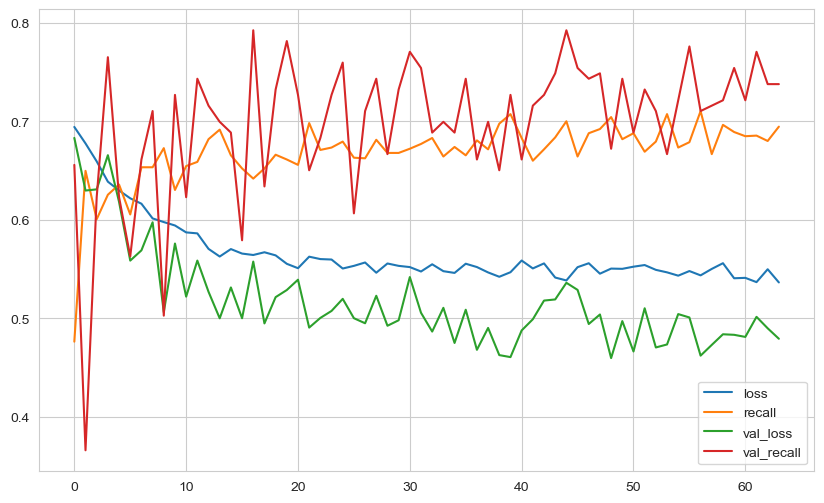

In [71]:
loss_df = pd.DataFrame(early_stop_model.history.history)
loss_df.plot()
plt.show()

In [72]:
loss, Recall = early_stop_model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
early_stop_Recall= print("early_stop_Recall: ", Recall)
early_stop_Recall=Recall

loss:  0.48490262031555176
early_stop_Recall:  0.7892156839370728


In [73]:
y_pred = early_stop_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 368us/step
[[592 204]
 [ 43 161]]
              precision    recall  f1-score   support

           0       0.93      0.74      0.83       796
           1       0.44      0.79      0.57       204

    accuracy                           0.75      1000
   macro avg       0.69      0.77      0.70      1000
weighted avg       0.83      0.75      0.77      1000



## optuna

In [74]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15
)

In [75]:
trial_metric = "Recall"
batch_size = 64


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_train, y_train),
        batch_size=batch_size,
        epochs=1000,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_train, y_train, verbose=0)[1]
    return score

In [76]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=8)
study.best_params

[I 2023-10-30 23:07:29,154] A new study created in memory with name: no-name-448ab1ce-cb7a-43d2-b223-b66c611f173f


Epoch 17: early stopping


[I 2023-10-30 23:07:31,547] Trial 0 finished with value: 0.0 and parameters: {'n_units1': 71, 'n_units2': 51, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>, 'learning_rate': 0.042526042243460974, 'w0': 0.9128982642825187, 'w1': 0.14280282144966916}. Best is trial 0 with value: 0.0.


Epoch 16: early stopping


[I 2023-10-30 23:07:33,991] Trial 1 finished with value: 1.0 and parameters: {'n_units1': 30, 'n_units2': 83, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 1.1669603075042595e-05, 'w0': 0.06605464406839762, 'w1': 0.48975515420658416}. Best is trial 1 with value: 1.0.


Epoch 35: early stopping


[I 2023-10-30 23:07:38,776] Trial 2 finished with value: 0.0 and parameters: {'n_units1': 112, 'n_units2': 90, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>, 'learning_rate': 0.0015663325901395379, 'w0': 1.3118322352517868, 'w1': 0.13254232519312234}. Best is trial 1 with value: 1.0.


Epoch 19: early stopping


[I 2023-10-30 23:07:41,931] Trial 3 finished with value: 0.0 and parameters: {'n_units1': 108, 'n_units2': 118, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 1.8062273621310628e-05, 'w0': 0.23783431687121628, 'w1': 0.0181471487697321}. Best is trial 1 with value: 1.0.


Epoch 162: early stopping


[I 2023-10-30 23:07:59,199] Trial 4 finished with value: 0.0 and parameters: {'n_units1': 24, 'n_units2': 118, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>, 'learning_rate': 0.004125501864086318, 'w0': 0.022527767959720734, 'w1': 0.016055403357348792}. Best is trial 1 with value: 1.0.


Epoch 52: early stopping


[I 2023-10-30 23:08:05,087] Trial 5 finished with value: 0.021212121471762657 and parameters: {'n_units1': 63, 'n_units2': 42, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, 'learning_rate': 0.011876470624017801, 'w0': 4.6307540942843115, 'w1': 0.01239560159418068}. Best is trial 1 with value: 1.0.


Epoch 52: early stopping


[I 2023-10-30 23:08:11,179] Trial 6 finished with value: 0.39393940567970276 and parameters: {'n_units1': 68, 'n_units2': 70, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, 'learning_rate': 0.0018192495418014602, 'w0': 1.050312904306989, 'w1': 0.3813094651687672}. Best is trial 1 with value: 1.0.


Epoch 51: early stopping


[I 2023-10-30 23:08:17,775] Trial 7 finished with value: 0.34303030371665955 and parameters: {'n_units1': 107, 'n_units2': 88, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, 'learning_rate': 0.026312210160330026, 'w0': 4.639672043830634, 'w1': 2.650091416624417}. Best is trial 1 with value: 1.0.


{'n_units1': 30,
 'n_units2': 83,
 'optimizer': keras.optimizers.optimizer_experimental.nadam.Nadam,
 'learning_rate': 1.1669603075042595e-05,
 'w0': 0.06605464406839762,
 'w1': 0.48975515420658416}

In [77]:
# build model with optuna parameters
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)
tf.random.set_seed(42)
optuna_model = Sequential()
optuna_model.add(Dense(unit1, activation="relu"))
optuna_model.add(Dense(unit2, activation="relu"))
optuna_model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
optuna_model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
optuna_model.fit(
    X_train,
    y_train,
    validation_data=(X_val,y_val),
    batch_size=64,
    epochs=1000,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/1000
127/127 [==============================] - 1s 1ms/step - loss: 0.6762 - recall: 0.4055 - val_loss: 0.6671 - val_recall: 0.2568
Epoch 2/1000
127/127 [==============================] - 0s 658us/step - loss: 0.6586 - recall: 0.1600 - val_loss: 0.6500 - val_recall: 0.0546
Epoch 3/1000
127/127 [==============================] - 0s 640us/step - loss: 0.6422 - recall: 0.0164 - val_loss: 0.6341 - val_recall: 0.0055
Epoch 4/1000
127/127 [==============================] - 0s 685us/step - loss: 0.6270 - recall: 0.0012 - val_loss: 0.6193 - val_recall: 0.0000e+00
Epoch 5/1000
127/127 [==============================] - 0s 702us/step - loss: 0.6126 - recall: 0.0000e+00 - val_loss: 0.6053 - val_recall: 0.0000e+00
Epoch 6/1000
127/127 [==============================] - 0s 688us/step - loss: 0.5991 - recall: 0.0000e+00 - val_loss: 0.5923 - val_recall: 0.0000e+00
Epoch 7/1000
127/127 [==============================] - 0s 818us/step - loss: 0.5864 - recall: 0.0000e+00 - val_loss: 0.5800 - val

In [78]:
optuna.visualization.plot_optimization_history(study)

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [79]:
history = optuna_model.history.history

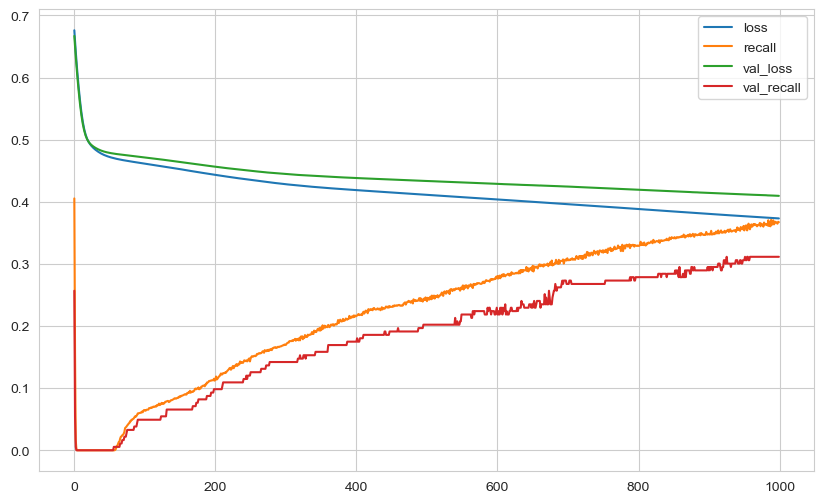

In [80]:
loss_df = pd.DataFrame(optuna_model.history.history)
loss_df.plot()
plt.show()

In [81]:
loss, Recall = optuna_model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
optuna_Recall= print("optuna_Recall: ", Recall)
optuna_Recall= Recall

loss:  0.3878999650478363
optuna_Recall:  0.36274510622024536


In [82]:
y_pred = (optuna_model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 349us/step
[[771  25]
 [130  74]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       796
           1       0.75      0.36      0.49       204

    accuracy                           0.84      1000
   macro avg       0.80      0.67      0.70      1000
weighted avg       0.83      0.84      0.82      1000



 1/32 [..............................] - ETA: 0s

32/32 [==============================] - 0s 418us/step


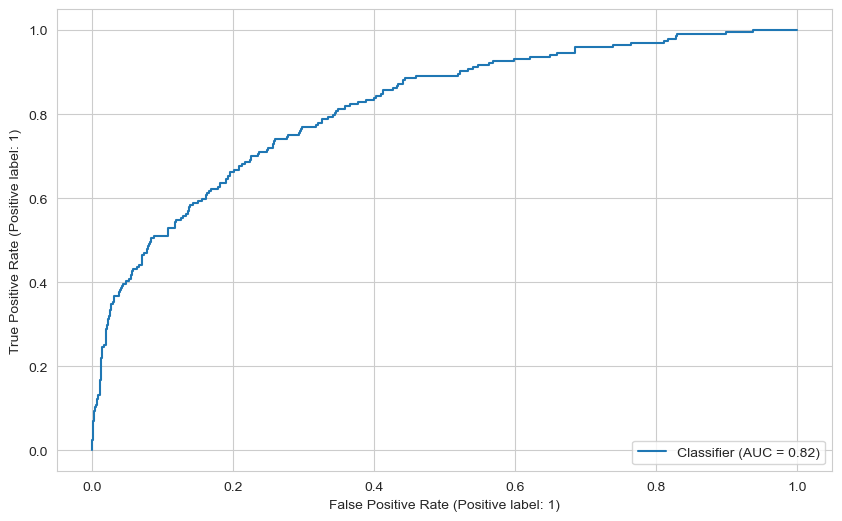

In [83]:
y_pred_proba = optuna_model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [84]:
roc_auc_score(y_test, y_pred_proba)

0.8163858508227411

# Final Model and Model Deployment

[Text(0, 0, '0.789'),
 Text(0, 0, '0.711'),
 Text(0, 0, '0.706'),
 Text(0, 0, '0.681'),
 Text(0, 0, '0.529'),
 Text(0, 0, '0.363')]

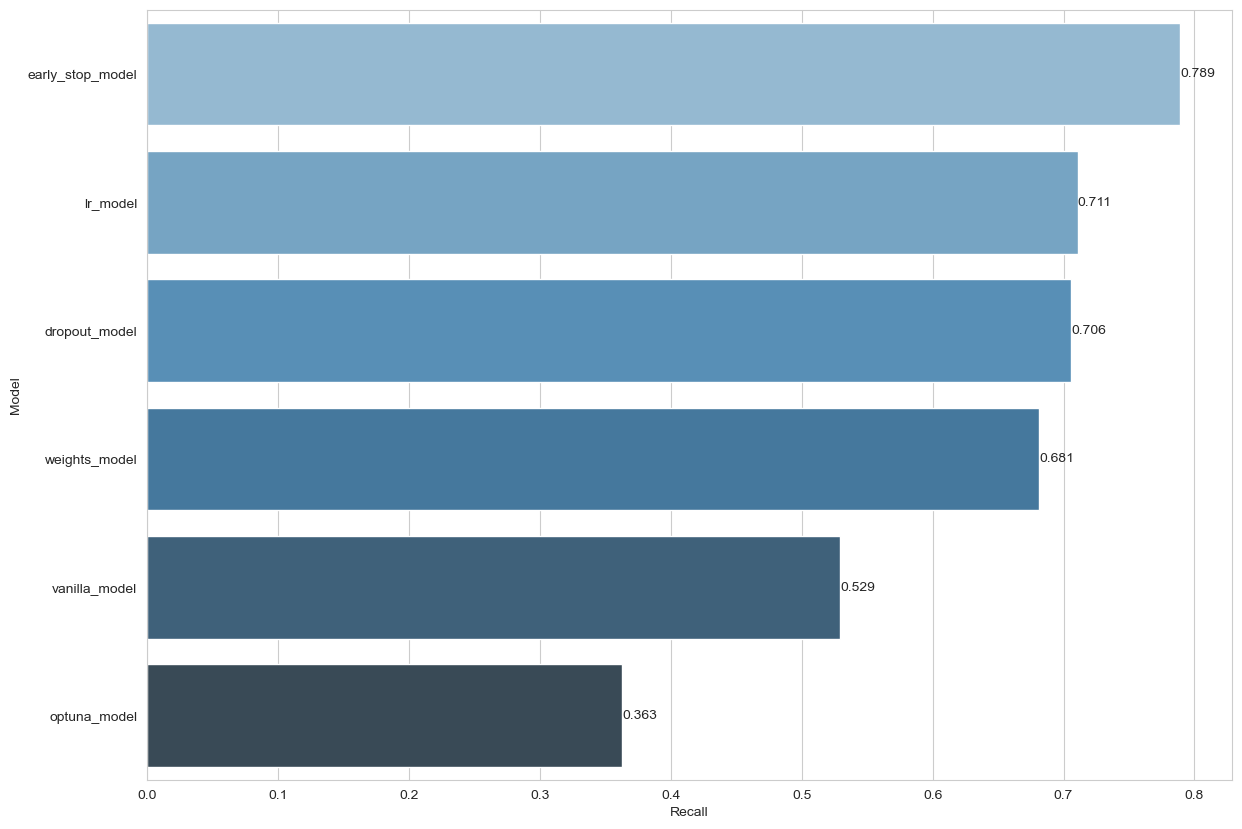

In [85]:
# compare models based on highest recall 

compare = pd.DataFrame(
    {
        "Model": ['vanilla_model', 'weights_model', 'lr_model', 'dropout_model', 'early_stop_model', 'optuna_model'],
    
        "Recall": [vanilla_Recall, weights_Recall, lr_Recall, dropout_Recall, early_stop_Recall, optuna_Recall ],
        
    }
)


plt.figure(figsize=(14, 10))
plt.plot()
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")


Choose the best recall model, the 'early stop model' with 78 recall for minority class and 44 precision.

### Save final model

In [86]:
#save the best model with 78 Recall
early_stop_model.save("model_churn.h5")

In [101]:
#save the scaler and transformer
pickle.dump(scaler, open('scaler_churn.sav', 'wb'))
pickle.dump(column_transformer, open('transformer_churn.sav', 'wb'))


In [102]:
#load model, scaler and transformer 
ChurnPrediction_model = load_model('model_churn.h5')
scaler = pickle.load(open('scaler_churn.sav', 'rb'))
transformer = pickle.load(open('transformer_churn.sav', 'rb'))

## Evaluate the model and make predictions

In [103]:
#evaluate model
loss, Recall = ChurnPrediction_model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("ChurnPrediction_model: ", Recall)

loss:  0.48490262031555176
ChurnPrediction_model:  0.7892156839370728


In [104]:
y_pred = (ChurnPrediction_model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))

 1/32 [..............................] - ETA: 1s

32/32 [==============================] - 0s 458us/step
[[592 204]
 [ 43 161]]


In [105]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.74      0.83       796
           1       0.44      0.79      0.57       204

    accuracy                           0.75      1000
   macro avg       0.69      0.77      0.70      1000
weighted avg       0.83      0.75      0.77      1000



In [106]:
churn_costumer = df.head(10)
churn_costumer

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
5,645,Spain,Male,44,8,113755.780,2,1,0,149756.710,1
6,822,France,Male,50,7,0.000,2,1,1,10062.800,0
7,376,Germany,Female,29,4,115046.740,4,1,0,119346.880,1
8,501,France,Male,44,4,142051.070,2,0,1,74940.500,0
9,684,France,Male,27,2,134603.880,1,1,1,71725.730,0


In [107]:
#drop y 
x_churn_costumer = churn_costumer.drop('Exited', axis=1)
x_churn_costumer

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.000,1,1,1,101348.880
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580
2,502,France,Female,42,8,159660.800,3,1,0,113931.570
3,699,France,Female,39,1,0.000,2,0,0,93826.630
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100
5,645,Spain,Male,44,8,113755.780,2,1,0,149756.710
6,822,France,Male,50,7,0.000,2,1,1,10062.800
7,376,Germany,Female,29,4,115046.740,4,1,0,119346.880
8,501,France,Male,44,4,142051.070,2,0,1,74940.500
9,684,France,Male,27,2,134603.880,1,1,1,71725.730


In [108]:
churn_costumer.iloc[0]

CreditScore              619
Geography             France
Gender                Female
Age                       42
Tenure                     2
Balance                0.000
NumOfProducts              1
HasCrCard                  1
IsActiveMember             1
EstimatedSalary   101348.880
Exited                     1
Name: 0, dtype: object

In [109]:
churn_costumer.iloc[1]

CreditScore              608
Geography              Spain
Gender                Female
Age                       41
Tenure                     1
Balance            83807.860
NumOfProducts              1
HasCrCard                  0
IsActiveMember             1
EstimatedSalary   112542.580
Exited                     0
Name: 1, dtype: object

In [110]:
# transform and scale data
transformed = transformer.fit_transform(x_churn_costumer)
transformed = scaler.fit_transform(transformed)
transformed.shape

(10, 13)

In [111]:
#select observation from class 1 to make predection on it

exited_example = transformed[[7]]
exited_example

array([[1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.08695652, 0.42857143, 0.72056973, 1.        ,
        1.        , 0.        , 0.78231098]])

In [112]:
# get predection on the observation we choose

# the predection was correct

((ChurnPrediction_model.predict(exited_example) > 0.7 ).astype('int'))




1/1 [==============================] - 0s 17ms/step


array([[1]])

In [113]:
#select observation from class 0 to make predection on it

not_exited_example = transformed[[9]]
print(not_exited_example)

[[0.         1.         1.         0.         0.         0.64978903
  0.         0.14285714 0.84306154 0.         1.         1.
  0.44141459]]


In [114]:
# get predection on the observation we choose
# the predection was correct

((ChurnPrediction_model.predict(not_exited_example) > 0.7).astype('int'))

1/1 [==============================] - 0s 30ms/step


array([[0]])

Final model recall 0.79 for  class 1 'exited costumer' which we focuce on so we predict every costumer will close his account befor he does 

set the threshold > 0.7 for correct prediction.

The model predicted customer correct for both classes.

even though it still needs improvements.


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___